In [84]:
import torch

In [94]:
nn.Parameter(torch.rand(2, 2).normal_(0.0, 0.01))

Parameter containing:
tensor([[-0.0194,  0.0012],
        [ 0.0084, -0.0049]], requires_grad=True)

In [87]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.linear = torch.nn.Linear(2,1)
    
    def forward(self,x):
        return self.linear(x)

In [88]:
mlp = MLP()

In [122]:
x = torch.tensor([1,2,3]).view(1,1,3)
y = torch.tensor([2,3,4]).view(1,1,3)
mse = torch.nn.MSELoss()

In [123]:
n = torch.stack([x,y])

In [125]:
n.float().mean(0).size()

torch.Size([1, 1, 3])

In [93]:
o = mlp(x)
mse(o,y)

tensor(0.1373, grad_fn=<MseLossBackward>)

In [ ]:
torch.nn.L1Loss

In [ ]:
t = torch.tensor([1,2,3,4,5]).view(1,1,5).float()
t2 = torch.tensor([2,3,4,5,6]).view(1,1,5).float()

In [ ]:
l = [t,t2]

In [ ]:
new = torch.stack(l)
print(new)
print(new.size())

In [ ]:
new.mean(0).size()

# Load in generator and Embedder

In [1]:
import torch
from models import *
from Dataset import *
from train import *
import torchvision

In [ ]:
torch.nn.MSELoss

In [252]:
checkpoint = torch.load("/mnt/d/ssudhakaran/Code/SamsungFace/TalkingFaceModels/checkpoints/2019-06-20 15:02:45.162946_256_256_50_epochs/19_epoch.tar")

In [253]:
keys = list(checkpoint.keys())
print(keys)

['epoch', 'projection_dims', 'embedding_dims', 'num_sequences', 'generator', 'embedder', 'discriminator', 'generator_embedder_optimizer', 'discriminator_optimizer']


In [254]:
projection_dims = checkpoint['projection_dims']
embedding_dims = checkpoint['embedding_dims']

In [255]:
g = GeneratorV3(projection_dims=projection_dims)
e = Embedder(embedding_dims=embedding_dims)

In [256]:
g.load_state_dict(checkpoint["generator"])
e.load_state_dict(checkpoint["embedder"])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [225]:
l2 = list(e.downres1.children())[1][0][0].weight

In [257]:
l1 = list(g.res1.children())[0][0][1].weight

In [260]:
torch.nn.L1Loss()(l1.view(-1),l2.view(-1))

tensor(4.3662e-05)

In [261]:
reshaped_dir = "/mnt/d/ssudhakaran/Code/SamsungFace/SamsungFace/data/youtube_aligned/aligned_images_DB_reshaped"
landmark_dir = "/mnt/d/ssudhakaran/Code/SamsungFace/SamsungFace/data/youtube_aligned/aligned_images_DB_landmarks"
overlay_dir = "/mnt/d/ssudhakaran/Code/SamsungFace/SamsungFace/data/youtube_aligned/aligned_images_DB_landmarks_overlayed"

reshaped_d, reshaped_sequence_count, reshaped_sequences = get_data_dict(reshaped_dir)
landmark_d, landmark_sequence_count, landmark_sequences = get_data_dict(landmark_dir)

reshaped_sequence_count, reshaped_dict, landmark_dict, num_sequences = readImages(reshaped_sequence_count,reshaped_sequences,landmark_sequences)

print("Successfully loaded images and landmark images")
composer = Composer(projection_dims=128,embedding_dims=128,reshaped_sequences=reshaped_dict,landmark_sequences=landmark_dict,
                        landmark_sequence_count=reshaped_sequence_count,num_sequences=num_sequences)

  0%|          | 0/30 [00:00<?, ?it/s]

Reading in landmark images...


  0%|          | 0/30 [00:00<?, ?it/s]

Reading in reshaped images...


100%|██████████| 30/30 [00:28<00:00,  1.63s/it]


Successfully loaded images and landmark images
gpu available : False
Successfully created Dataloader
Successfully created Generator
Successfully created Embedder
Successfully created Discriminator
Successfully loaded pretrained VGG19 and VGGFace


In [251]:
n = landmark_sequences['/mnt/d/ssudhakaran/Code/SamsungFace/SamsungFace/data/youtube_aligned/aligned_images_DB_landmarks/Aaron_Eckhart/0']   

In [103]:
im = skimage.io.imread(n[0])
im = cv2.resize(im,(224,224))

In [113]:
im = im.transpose(2,1,0)

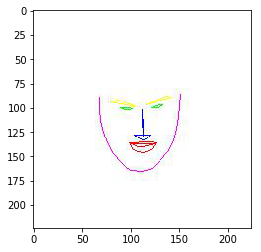

In [116]:
plt.imshow(im.transpose(2,1,0))

In [137]:
dataloader = composer.dataloader

In [262]:
l = list(dataloader)

In [263]:
target, sampled = l[5]

In [264]:
target, sampled_vids = composer.imgsToDevice(target,sampled)

In [265]:
embedding = e.average_embeddings(sampled)

In [266]:
x,y = target

In [267]:
img = y[0].numpy().reshape(224,224,3).astype(np.uint8)

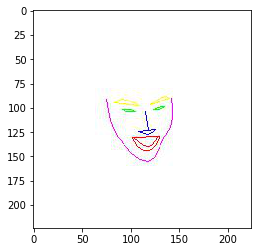

In [268]:
plt.imshow(img)

In [269]:
m = g(y,embedding)

In [270]:
m

tensor([[[[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]],

         [[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]], grad_fn=<TanhBackward>)

In [271]:
output = m.detach()[0].numpy().transpose(1,2,0)*255.0

In [276]:
output = (m.detach()[0].numpy()).reshape(224,224,3).astype(np.uint8)

In [190]:
output = output.clip(0,255)

In [191]:
output.shape

(224, 224, 3)

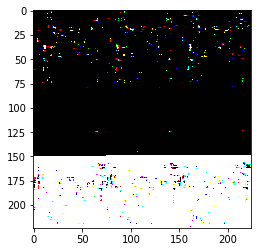

In [277]:
plt.imshow(output.astype(np.uint8))

In [74]:
plt.imshow(img)

NameError: name 'img' is not defined

In [ ]:
plt.imshow(x[0].numpy().reshape(224,224,3).astype(np.uint8))

In [ ]:
k = list(reshaped_sequences.keys())

In [ ]:
o = readImg(reshaped_sequences[k[0]][0])